<h1><b>MULTIPLICACÍON DE MATRICES</b></h1>

In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2> Algoritmo de multiplicacion: c_{ij} = \sum_{k=1}^n a_{ik}*b_{kj}</h2>

In [2]:
def multiplicacionMatriz(matriz1, matriz2, tama):
    matriz3=np.zeros((tama, tama))
   
    for i in range(tama):
        for j in range(tama):
            for k in range(tama):
                matriz3[i][j]= matriz3[i][j]+ (matriz1[i][k]*matriz2[k][j]);
                
    return matriz3;
    


In [5]:
print ("Ingrese el tamaño de la matriz");
tama= int(input());
matriz1=np.random.randint(0, 30, (tama, tama))
matriz2=np.random.randint(0, 30, (tama, tama))

print "Matriz1:  \n",matriz1 
print "Matriz2:  \n",matriz2

print"Matriz Resultante:\n",multiplicacionMatriz(matriz1,matriz2,tama);

Ingrese el tamaño de la matriz
4
Matriz1:  
[[26  1 23 21]
 [12 17  1  1]
 [22 15 12 12]
 [ 8 25  5 15]]
Matriz2:  
[[15 15 20  4]
 [ 0 25 15  0]
 [24 10 11  6]
 [ 8 18 24 15]]
Matriz Resultante:
[[ 1110.  1023.  1292.   557.]
 [  212.   633.   530.    69.]
 [  714.  1041.  1085.   340.]
 [  360.  1065.   950.   287.]]


<h2>Conteo de pasos del algoritmo</h2>

In [8]:
class Counter:
   
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def multiplicacionMatriz_counter(matriz1, matriz2, tama,acct):
    matriz3=np.zeros((tama, tama))
    acct.count()   
    for i in range(tama):
        acct.count()
        for j in range(tama):
            acct.count()
            for k in range(tama):
                acct.count()
                matriz3[i][j]= matriz3[i][j]+ (matriz1[i][k]*matriz2[k][j]);
                acct.count()
                acct.count()
                
    return matriz3
                
   

In [9]:
print ("Ingrese el tamaño de la matriz");
tama= int(input());
matriz1=np.random.randint(0, 30, (tama, tama))
matriz2=np.random.randint(0, 30, (tama, tama))
acct = Counter()
multiplicacionMatriz_counter(matriz1, matriz2, tama,acct)
acct.print_steps()

Ingrese el tamaño de la matriz
4
Number of steps = 213


In [10]:
import random as rnd


def exper_analysis(n):
    results = []
    acct = Counter()
    i=1
    for i in range(2,n):
        acct.reset()
        matriz1=np.random.randint(0, 30, (i, i))
        matriz2=np.random.randint(0, 30, (i, i))
        multiplicacionMatriz_counter(matriz1, matriz2, i,acct)
        results.append(acct.steps)
    return results

In [11]:
print (exper_analysis(20))

[31, 94, 213, 406, 691, 1086, 1609, 2278, 3111, 4126, 5341, 6774, 8443, 10366, 12561, 15046, 17839, 20958]


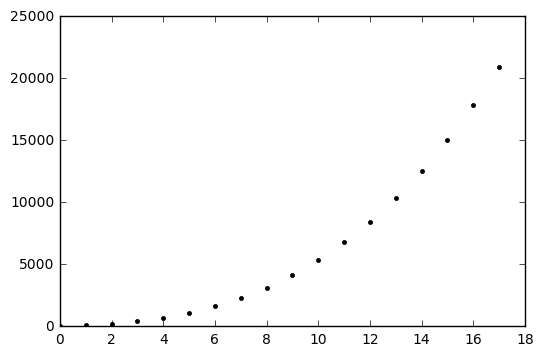

In [12]:
pl.clf()
x = np.arange(18)
y = np.array(exper_analysis(20))
pl.plot(x, y, 'k.')

<h1><b>DIVIDIR Y CONQUISTAR</b></h1>


In [42]:
def suma(A, B):
    n = len(A)
    C = np.zeros((n,n))
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] + B[i][j]
    return C

def dividir(matriz1, matriz2):
    
    if(len(matriz1)==2):
        return multiplicacionMatriz(matriz1, matriz2, 2)
    else:
        tama= len(matriz1)
        if(tama%2!=0):
            c=np.zeros((tama,1))
            f=np.zeros((1,(tama+1)))
            mat1=np.c_[matriz1,c]
            mat1=np.r_[mat1,f]
            mat2=np.c_[matriz2,c]
            mat2=np.r_[mat2,f]
            tama= len(mat1)
            ceros=1
        else:
            tama= len(matriz1)
            mat1=matriz1
            mat2=matriz2
            ceros=0
        
        matriz3=np.zeros((tama,tama))
        div=tama/2
        a11=mat1[:div,:div]
        a12=mat1[:div,div:tama]
        a13=mat1[div:tama,:div]
        a14=mat1[div:tama,div:tama]
        b11=mat2[:div,:div]
        b12=mat2[:div,div:tama]
        b13=mat2[div:tama,:div]
        b14=mat2[div:tama,div:tama]
        
        c11a=dividir(a11, b11)
        c11b=dividir(a12,b13)
        
        c11=suma(c11a,c11b)
        
        c12a=dividir(a11, b12)
        c12b=dividir(a12,b14)
        c12=suma(c12a,c12b)
        
        c13a=dividir(a13, b11)
        c13b=dividir(a14,b13)
        c13=suma(c13a,c13b)
        
        c14a=dividir(a13, b12)
        c14b=dividir(a14, b14)
        c14=suma(c14a,c14b)
    
        c11=np.c_[c11,c12]
        c13=np.c_[c13,c14]
        c11=np.r_[c11,c13]
       
        if ceros==1:
            tm=len(c11)
            c11=c11[:tm-1,:tm-1]
            
        return c11

In [44]:
print ("Ingrese el tamaño de la matriz");
tama= int(input());
matriz1=np.random.randint(0, 30, (tama, tama))
matriz2=np.random.randint(0, 30, (tama, tama))
print "Matriz1:  \n",matriz1
print "Matriz2:  \n",matriz2
print"Matriz Resultante:\n",dividir(matriz1, matriz2)


Ingrese el tamaño de la matriz
5
Matriz1:  
[[14 12 25  3  6]
 [ 7 16 23 21 20]
 [21 17 15 29  9]
 [12  2  6 13  1]
 [ 3 13 27 22 29]]
Matriz2:  
[[ 9  0  5  5 24]
 [23 12  9 13 21]
 [ 0 24  1 26 22]
 [13  0  2 20  9]
 [17 12  5  6 29]]
Matriz Resultante:
[[  543.   816.   239.   972.  1339.]
 [ 1044.   984.   344.  1381.  1779.]
 [ 1110.   672.   376.  1350.  1713.]
 [  340.   180.   115.   508.   608.]
 [ 1105.  1152.   348.  1500.  1978.]]


<h1>Conteo de pasos</h1>

In [45]:
def suma_cont(A, B,acct):
    acct.count()
    n = len(A)
    acct.count()
    C = np.zeros((n,n))
    acct.count()
    for i in range(0, n):
        acct.count()
        for j in range(0, n):
            acct.count()
            C[i][j] = A[i][j] + B[i][j]
            acct.count()
    return C

def dividir_cont(matriz1, matriz2,acct):
    global c11
    acct.count()
    if(len(matriz1)==2):
        acct.count()
        return multiplicacionMatriz_counter(matriz1, matriz2, 2,acct)
    else:
        tama= len(matriz1)
        acct.count()
        if(tama%2!=0):
            c=np.zeros((tama,1))
            acct.count()
            f=np.zeros((1,(tama+1)))
            acct.count()
            mat1=np.c_[matriz1,c]
            acct.count()
            mat1=np.r_[mat1,f]
            acct.count()
            mat2=np.c_[matriz2,c]
            acct.count()
            mat2=np.r_[mat2,f]
            acct.count()
            tama= len(mat1)
            acct.count()
        else:
            acct.count()
            tama= len(matriz1)
            acct.count()
            mat1=matriz1
            acct.count()
            mat2=matriz2
        
        matriz3=np.zeros((tama,tama))
        div=tama/2
        acct.count()
        a11=mat1[:div,:div]
        acct.count()
        a12=mat1[:div,div:tama]
        acct.count()
        a13=mat1[div:tama,:div]
        acct.count()
        a14=mat1[div:tama,div:tama]
        acct.count()
        b11=mat2[:div,:div]
        acct.count()
        b12=mat2[:div,div:tama]
        acct.count()
        b13=mat2[div:tama,:div]
        acct.count()
        b14=mat2[div:tama,div:tama]
        acct.count()
        c11a=dividir_cont(a11, b11,acct)
        acct.count()

        c11b=dividir_cont(a12,b13,acct)
        acct.count()
        c11=suma_cont(c11a,c11b,acct)
        acct.count()
        
        c12a=dividir_cont(a11, b12,acct)
        acct.count()
        c12b=dividir_cont(a12,b14,acct)
        acct.count()
        c12=suma_cont(c12a,c12b,acct)
        acct.count()
        
        c13a=dividir_cont(a13, b11,acct)
        acct.count()
        c13b=dividir_cont(a14,b13,acct)
        acct.count()
        c13=suma_cont(c13a,c13b,acct)
        acct.count()
        
        c14a=dividir_cont(a13, b12,acct)
        acct.count()
        c14b=dividir_cont(a14, b14,acct)
        acct.count()
        c14=suma_cont(c14a,c14b,acct)
        acct.count()
        
        c11=np.c_[c11,c12]
        acct.count()
        c13=np.c_[c13,c14]
        acct.count()
        c11=np.r_[c11,c13]
        acct.count()
        return c11

In [46]:
print ("Ingrese el tamaño de la matriz");
tama= int(input());
matriz1=np.random.randint(0, 30, (tama, tama))
matriz2=np.random.randint(0, 30, (tama, tama))
acct = Counter()
dividir_cont(matriz1, matriz2, acct)
acct.print_steps()

Ingrese el tamaño de la matriz
5
Number of steps = 2981


In [47]:
def exper_analysis_divide(n):
    results = []
    acct = Counter()
    i=1
    for i in range(2,n):
        acct.reset()
        matriz1=np.random.randint(0, 30, (i, i))
        matriz2=np.random.randint(0, 30, (i, i))
        dividir_cont(matriz1, matriz2,acct)
        results.append(acct.steps)
    return results

In [48]:
print (exper_analysis_divide(20))

[33, 349, 345, 2981, 2977, 2949, 2945, 24437, 24433, 24405, 24401, 24181, 24177, 24149, 24145, 197653, 197649, 197621]


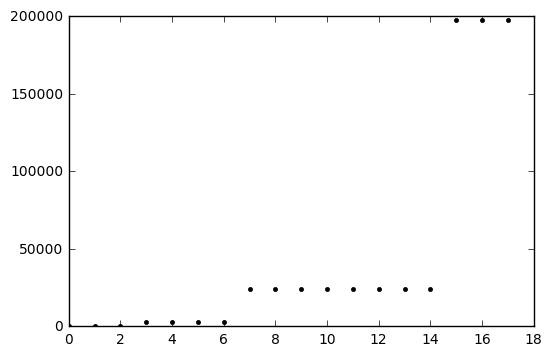

In [49]:
pl.clf()
x = np.arange(18)
y = np.array(exper_analysis_divide(20))
pl.plot(x, y, 'k.')

<h1>Algoritmo de Strassen</h1>


In [52]:
def suma(A, B):
    n = len(A)
    C = np.zeros((n,n))
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] + B[i][j]
    return C

def resta(A, B):
    n = len(A)
    C = np.zeros((n,n))
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] - B[i][j]
    return C


def strassen(matriz1, matriz2):
    if(len(matriz1)==2):
        return multiplicacionMatriz(matriz1, matriz2, 2)
    else:
        tama= len(matriz1)
        if(tama%2!=0):
            c=np.zeros((tama,1))
            f=np.zeros((1,(tama+1)))
            mat1=np.c_[matriz1,c]
            mat1=np.r_[mat1,f]
            mat2=np.c_[matriz2,c]
            mat2=np.r_[mat2,f]
            tama= len(mat1)
            ceros=1
        else:
            tama= len(matriz1)
            mat1=matriz1
            mat2=matriz2
            ceros=0
        
        div=tama/2
        a11=mat1[:div,:div]
        a12=mat1[:div,div:tama]
        a21=mat1[div:tama,:div]
        a22=mat1[div:tama,div:tama]
        b11=mat2[:div,:div]
        b12=mat2[:div,div:tama]
        b21=mat2[div:tama,:div]
        b22=mat2[div:tama,div:tama]
        bResult=np.zeros((div,div))
        aResult=np.zeros((div,div))
        

        aResult=suma(a11,a22)

        bResult=suma(b11,b22)
        
        m1=strassen(aResult,bResult)
    
        aResult = suma(a21, a22)      
        m2 = strassen(aResult, b11)
        
        bResult = resta(b12, b22) 
        m3 = strassen(a11, bResult)  
        
        bResult = resta(b21, b11)
        m4 =strassen(a22, bResult)   
        
        aResult = suma(a11, a12)      
        m5 = strassen(aResult, b22)    

        aResult = resta(a21, a11) 
        bResult = suma(b11, b12)      
        m6 = strassen(aResult, bResult) 

        aResult = resta(a12, a22) 
        bResult = suma(b21, b22)      
        m7 = strassen(aResult, bResult) 
        
        c12 = suma(m3, m5) 
        c21 = suma(m2, m4)  

        aResult = suma(m1, m4) 
        bResult = suma(aResult, m7) 
        c11 = resta(bResult, m5) 

        aResult = suma(m1, m3) 
        bResult = suma(aResult, m6) 
        c22 = resta(bResult, m2) 
        
        c11=np.c_[c11,c12]
        c21=np.c_[c21,c22]
        c11=np.r_[c11,c21]
        
        if ceros==1:
            tm=len(c11)
            c11=c11[:tm-1,:tm-1]

        return c11

In [53]:
print ("Ingrese el tamaño de la matriz");
tama= int(input());
matriz1=np.random.randint(0, 30, (tama, tama))
matriz2=np.random.randint(0, 30, (tama, tama))
print "Matriz1:  \n",matriz1 
print "Matriz2:  \n",matriz2
print"Matriz Resultante:\n",strassen(matriz1, matriz2)

Ingrese el tamaño de la matriz
5
Matriz1:  
[[21  4 26  8 28]
 [ 4 27 26 26  0]
 [20 15 21 18 27]
 [24 15  8 28 13]
 [29 10 18 17  2]]
Matriz2:  
[[ 1  6  7 29  8]
 [ 9 11  8  2  9]
 [12  6  6  9  1]
 [ 1  8 29 28  6]
 [26 18  7  2 11]]
Matriz Resultante:
[[ 1105.   894.   763.  1131.   586.]
 [  585.   685.  1154.  1132.   457.]
 [ 1127.  1041.  1097.  1357.   721.]
 [  621.   815.  1239.  1608.   646.]
 [  404.   564.   898.  1503.   464.]]


<h1>Conteo de pasos</h1>

In [54]:
def suma_cont(A, B,acct):
    acct.count()
    n = len(A)
    acct.count()
    C = np.zeros((n,n))
    acct.count()
    for i in range(0, n):
        acct.count()
        for j in range(0, n):
            acct.count()
            C[i][j] = A[i][j] + B[i][j]
            acct.count()
    return C

def resta_cont(A, B,acct):
    acct.count()
    n = len(A)
    acct.count()
    C = np.zeros((n,n))
    acct.count()
    for i in range(0, n):
        acct.count()
        for j in range(0, n):
            acct.count()
            C[i][j] = A[i][j] - B[i][j]
            acct.count()
    return C


def strassen_cont(matriz1, matriz2,acct):
    acct.count()
    if(len(matriz1)==2):
        acct.count()
        return multiplicacionMatriz(matriz1, matriz2, 2)
    else:
        acct.count()
        tama= len(matriz1)
        acct.count()
        if(tama%2!=0):
            acct.count()
            c=np.zeros((tama,1))
            acct.count()
            f=np.zeros((1,(tama+1)))
            acct.count()
            mat1=np.c_[matriz1,c]
            acct.count()
            mat1=np.r_[mat1,f]
            acct.count()
            mat2=np.c_[matriz2,c]
            acct.count()
            mat2=np.r_[mat2,f]
            acct.count()
            tama= len(mat1)
            acct.count()
        else:
            acct.count()
            tama= len(matriz1)
            acct.count()
            mat1=matriz1
            acct.count()
            mat2=matriz2
            acct.count()
            
        
        div=tama/2
        acct.count()
        a11=mat1[:div,:div]
        acct.count()
        a12=mat1[:div,div:tama]
        acct.count()
        a21=mat1[div:tama,:div]
        acct.count()
        a22=mat1[div:tama,div:tama]
        acct.count()
        b11=mat2[:div,:div]
        acct.count()
        b12=mat2[:div,div:tama]
        acct.count()        
        b21=mat2[div:tama,:div]
        acct.count()
        b22=mat2[div:tama,div:tama]
        acct.count()
        bResult=np.zeros((div,div))
        acct.count()
        aResult=np.zeros((div,div))
        acct.count()

        aResult=suma_cont(a11,a22,acct)
        acct.count()
        bResult=suma_cont(b11,b22,acct)
        acct.count()
        m1=strassen_cont(aResult,bResult,acct)
        acct.count()
        aResult = suma_cont(a21, a22,acct)      
        acct.count()
        m2 = strassen_cont(aResult, b11,acct)
        acct.count()
        bResult = resta_cont(b12, b22,acct) 
        acct.count()
        m3 = strassen_cont(a11, bResult,acct)  
        acct.count()
        bResult = resta_cont(b21, b11,acct)
        acct.count()
        m4 =strassen_cont(a22, bResult,acct)   
        acct.count()
        aResult = suma_cont(a11, a12,acct)      
        acct.count()
        m5 = strassen_cont(aResult, b22,acct)    
        acct.count()
        
        aResult = resta_cont(a21, a11,acct) 
        acct.count()
        bResult = suma_cont(b11, b12,acct)      
        acct.count()
        m6 = strassen_cont(aResult, bResult,acct) 
        acct.count()
        
        aResult = resta_cont(a12, a22,acct) 
        acct.count()
        bResult = suma_cont(b21, b22,acct)      
        acct.count()
        m7 = strassen_cont(aResult, bResult,acct) 
        acct.count()
        c12 = suma_cont(m3, m5,acct) 
        acct.count()
        c21 = suma_cont(m2, m4,acct)  
        acct.count()
        
        aResult = suma_cont(m1, m4,acct) 
        acct.count()
        bResult = suma_cont(aResult, m7,acct) 
        acct.count()
        c11 = resta_cont(bResult, m5,acct) 
        acct.count()
        
        
        aResult = suma_cont(m1, m3,acct) 
        acct.count()
        bResult = suma_cont(aResult, m6,acct) 
        acct.count()
        c22 = resta_cont(bResult, m2,acct) 
        acct.count()
        
        c11=np.c_[c11,c12]
        acct.count()
        c21=np.c_[c21,c22]
        acct.count()
        c11=np.r_[c11,c21]
        acct.count()
        return c11

In [55]:
print ("Ingrese el tamaño de la matriz");
tama= int(input());
matriz1=np.random.randint(0, 30, (tama, tama))
matriz2=np.random.randint(0, 30, (tama, tama))
acct = Counter()
strassen_cont(matriz1, matriz2, acct)
acct.print_steps()

Ingrese el tamaño de la matriz
5
Number of steps = 2688


In [56]:
def exper_analysis_strassen(n):
    results = []
    acct = Counter()
    i=1
    for i in range(2,n):
        acct.reset()
        matriz1=np.random.randint(0, 30, (i, i))
        matriz2=np.random.randint(0, 30, (i, i))
        strassen_cont(matriz1, matriz2,acct)
        results.append(acct.steps)
    return results

In [57]:
print (exper_analysis_strassen(20))

[2, 298, 294, 2688, 2684, 2810, 2806, 20558, 20554, 20760, 20756, 21912, 21908, 22194, 22190, 149944, 149940, 150306]


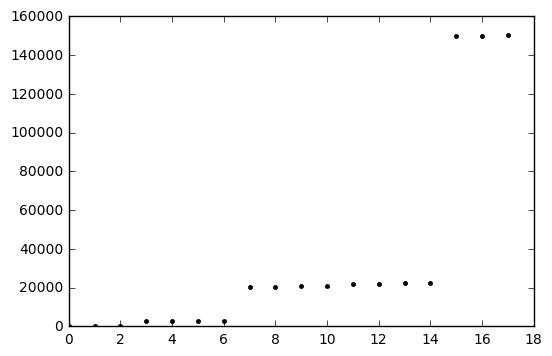

In [58]:
pl.clf()
x = np.arange(18)
y = np.array(exper_analysis_strassen(20))
pl.plot(x, y, 'k.')

<h1>Gráficas Conjuntas</h1>

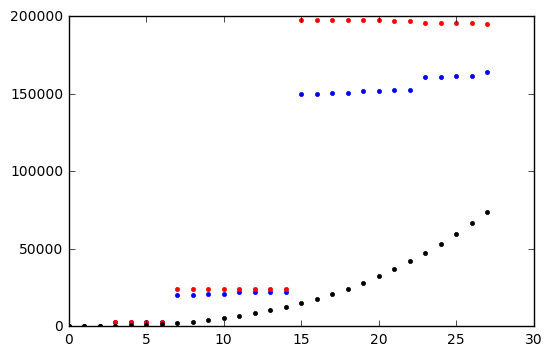

In [60]:
pl.clf()
x = np.arange(28)
y = np.array(exper_analysis_strassen(30))
pl.plot(x, y, 'k.',color="blue")       #Estrassen Color Azul
x = np.arange(28)
y = np.array(exper_analysis_divide(30))
pl.plot(x, y, 'k.',color="red")       #Dividir y Conquistar Color Rojo
x = np.arange(28)
y = np.array(exper_analysis(30))
pl.plot(x, y, 'k.')                    #Multiplicacion Normal Color Negro
